In [1]:
import glob
import io
import math
import os
import scipy

from __future__ import print_function
import keras
import tensorflow as tf
from keras import backend as K
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import model_from_json
import pandas as pd
import numpy as np
from sklearn.externals import joblib

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


/home/arina/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def z_score_normalize(series):
  mean = series.mean()
  std_dv = series.std()
  return series.apply(lambda x:(x - mean) / std_dv)

In [3]:
json_file = open('DNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
DNN_model = model_from_json(loaded_model_json)
DNN_model.load_weights("DNN-model-best.h5")
 
DNN_model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])


In [4]:
RF_model = joblib.load('RF_model.pkl')

In [5]:
test1_df = pd.read_csv(
    io.open("/home/arina/Kenji_proj/Kinase/prTar_wrong_test.1.tab", "r"), sep="\t")

np.random.seed(4)
test1_df = test1_df.reindex(np.random.permutation(test1_df.index))
test1_df = test1_df.drop('Compl',axis=1)

In [6]:
test1_df

,Comp,minimizedAffinity,ICM_hbonds,ICM_area,gauss_o0_w0_5_c8_,repulsion_o0_c8_,hydrophobic_g0_5_b1_5_c8_,non_hydrophobic_g0_5_b1_5_c8_,vdw_i6_j12_s1_100_c8_,non_dir_h_bond_lj_o_0_7_100_c8_,...,TOTAL_SOLV,POLAR_SOLV,NONPOLAR_SOLV,COULOMB,prTar,APF_score,Seq,APF_sim,Seq_distance,activ
3579,v103904595,-8.4,0,329.5,87.8,2.4,37.7,89.0,-643.2,-22.4,...,-20.7,-24.1,3.4,-1279.9,5JZN,-352.0,54.6,0.5,1.0,7.6
8674,v103904906,-9.8,1,248.4,76.7,1.4,50.0,40.5,-487.8,-12.9,...,-11.8,-14.6,2.8,-76.5,5BX6,-273.7,65.7,0.4,1.0,5.7
16717,v103904212,-7.8,2,289.6,78.5,2.3,46.2,35.8,-520.6,-9.4,...,-16.3,-18.8,2.5,-749.7,3V8S,-274.1,40.0,0.2,1.0,5.4
4392,v103904729,-9.3,1,277.7,86.4,1.6,46.5,62.2,-521.4,-21.7,...,-18.0,-20.7,2.6,-524.4,4OBO,-188.6,63.8,0.1,0.9,6.1
19851,v103904331,-9.8,0,320.0,78.4,1.2,29.8,68.2,-644.4,-14.0,...,-26.1,-29.6,3.5,-1176.0,3VO3,-316.5,66.2,0.3,0.9,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16840,v103904773,-8.9,1,376.7,100.6,2.9,38.4,74.1,-722.7,-11.7,...,-15.5,-19.2,3.7,-922.2,1Q41,-287.9,38.9,0.2,1.0,8.1
11863,v103904354,-9.3,1,321.7,80.3,1.4,39.4,60.4,-655.0,-11.1,...,-23.7,-27.9,4.2,-944.2,2CMW,-289.3,41.1,0.2,1.0,6.8
17093,v103904329,-8.9,2,241.0,57.5,0.5,44.6,38.5,-493.7,-7.1,...,-22.3,-25.5,3.2,-1040.4,2JDO,-323.1,78.1,0.3,0.9,6.1
8366,v103904458,-9.1,0,338.3,104.4,4.4,86.2,28.4,-683.3,-1.6,...,-22.7,-25.8,3.1,-646.6,4PMM,-555.4,39.7,0.5,1.0,6.8


In [7]:
test2_df = pd.read_csv(
    io.open("/home/arina/Kenji_proj/Kinase/prTar_aver_test2.1.tab", "r"), sep="\t")

np.random.seed(4)
test2_df = test2_df.reindex(np.random.permutation(test2_df.index))
test2_df = test2_df.drop('Compl',axis=1)
pdbs=set(test2_df.Tar)

In [8]:
test2_df

,Comp,minimizedAffinity,ICM_hbonds,ICM_area,gauss_o0_w0_5_c8_,repulsion_o0_c8_,hydrophobic_g0_5_b1_5_c8_,non_hydrophobic_g0_5_b1_5_c8_,vdw_i6_j12_s1_100_c8_,non_dir_h_bond_lj_o_0_7_100_c8_,...,TOTAL_SOLV,POLAR_SOLV,NONPOLAR_SOLV,COULOMB,prTar,APF_score,Seq,APF_sim,Seq_distance,activ
3579,v103904595,-8.4,0,329.5,87.8,2.4,37.7,89.0,-643.2,-22.4,...,-20.7,-24.1,3.4,-1279.9,2DQ7,-313.7,118.9,0.4,0.8,7.6
8674,v103904906,-9.8,1,248.4,76.7,1.4,50.0,40.5,-487.8,-12.9,...,-11.8,-14.6,2.8,-76.5,2X2M,-306.1,81.8,0.4,0.9,5.7
16717,v103904212,-7.8,2,289.6,78.5,2.3,46.2,35.8,-520.6,-9.4,...,-16.3,-18.8,2.5,-749.7,4OBO,-258.9,37.4,0.2,1.0,5.4
4392,v103904729,-9.3,1,277.7,86.4,1.6,46.5,62.2,-521.4,-21.7,...,-18.0,-20.7,2.6,-524.4,3BHY,-213.6,93.7,0.1,0.9,6.1
19851,v103904331,-9.8,0,320.0,78.4,1.2,29.8,68.2,-644.4,-14.0,...,-26.1,-29.6,3.5,-1176.0,2HW7,-368.2,80.5,0.4,0.9,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16840,v103904773,-8.9,1,376.7,100.6,2.9,38.4,74.1,-722.7,-11.7,...,-15.5,-19.2,3.7,-922.2,3E7O,-313.0,42.6,0.3,1.0,8.1
11863,v103904354,-9.3,1,321.7,80.3,1.4,39.4,60.4,-655.0,-11.1,...,-23.7,-27.9,4.2,-944.2,2DQ7,-388.7,123.6,0.4,0.8,6.8
17093,v103904329,-8.9,2,241.0,57.5,0.5,44.6,38.5,-493.7,-7.1,...,-22.3,-25.5,3.2,-1040.4,2CMW,-236.4,40.7,0.2,1.0,6.1
8366,v103904458,-9.1,0,338.3,104.4,4.4,86.2,28.4,-683.3,-1.6,...,-22.7,-25.8,3.1,-646.6,4IVA,-243.8,46.2,0.1,1.0,6.8


In [9]:
for var in ['APF_score','minimizedAffinity','nof_Atoms',
            'vdw_i6_j12_s1_100_c8_','non_dir_h_bond_lj_o_0_7_100_c8_',
            'non_dir_anti_h_bond_quadratic_o0_c8_','repulsion_o0_c8_',
            'non_dir_h_bond_g_0_7_b0_c8_','donor_donor_quadratic_o0_c8_',
            'acceptor_acceptor_quadratic_o0_c8_','electrostatic_i2_100_c8_',
            'ad4_solvation_d_sigma3_6_s_q0_01097_c8_','sc1','sc2','sc3',
            'scCons','xEnergy','ICM_hbonds','ICM_area','gauss_o0_w0_5_c8_',
            'Seq_distance','Seq','APF_score','APF_sim',
            'H_bond','Hal_bond','Salt_Bridges','pi_Cation','pi_Stacking',
            'hydrophobic_g0_5_b1_5_c8_','non_hydrophobic_g0_5_b1_5_c8_',
            'gauss_o3_w2_c8_','TOTAL_EELEC','TOTAL_SOLV', 'POLAR_SOLV', 
            'NONPOLAR_SOLV','COULOMB']:
    test1_df[var] = z_score_normalize(test1_df[var])
    test2_df[var] = z_score_normalize(test2_df[var])
 

In [10]:
cat_features=test1_df[['Tar','HR_1','HR_2','HR_3']]
num_features=test1_df.drop(cat_features, axis=1)
num_features=num_features.drop(['Comp','prTar'], axis=1)
all_feat=test1_df.drop(['activ','Comp'],axis=1)

In [11]:
for feat in cat_features:
    test1_df[feat] = pd.Categorical(test1_df[feat])
    dfDummies = pd.get_dummies(test1_df[feat], prefix = 'cat_'+str(feat))
    test1_df = pd.concat([test1_df, dfDummies], axis=1)
    test1_df = test1_df.drop(feat, axis=1)
    test2_df[feat] = pd.Categorical(test2_df[feat])
    dfDummies = pd.get_dummies(test2_df[feat], prefix = 'cat_'+str(feat))
    test2_df = pd.concat([test2_df, dfDummies], axis=1)
    test2_df = test2_df.drop(feat, axis=1)

In [12]:
for pdb in pdbs:
    newCol="cat_prTar_"+pdb
    test1_df[newCol]=0
    test2_df[newCol]=0

for pdb in pdbs:
    ii=test1_df[test1_df.prTar==pdb].index.tolist()
    col1='cat_prTar_' + str(pdb)
    test1_df[col1][ii] = 1
    jj=test2_df[test2_df.prTar==pdb].index.tolist()
    col2='cat_prTar_' + str(pdb)
    test2_df[col2][jj] = 1     
   
test1_df = test1_df.drop("prTar", axis=1)
test2_df = test2_df.drop("prTar", axis=1)

/home/arina/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/arina/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [13]:
testComp=['v103905639','v103905539','v103905616','v103905521','v103905590','v103905503','v103904865','v103905107','v103905657','v103904504','v103905622','v103904925','v103904871','v103905673','v103905378']
test1_df=test1_df[-test1_df.Comp.isin(testComp)]
test2_df=test2_df[-test2_df.Comp.isin(testComp)]


In [14]:
badTar=pd.read_csv(
    io.open("/home/arina/Kenji_proj/Kinase/test_badPrTar_list.tab", "r"), sep="\t")
list_test1=list(badTar.Comp)
averTar=pd.read_csv(
    io.open("/home/arina/Kenji_proj/Kinase/test_aver_prTar.tab", "r"), sep="\t")
list_test2=list(averTar.Comp)

In [15]:
testSet_1=test1_df[:][16000:]
testSet_2=test2_df[:][16000:]

testSet_1=testSet_1[testSet_1.Comp.isin(list_test1)]
testSet_1 = testSet_1.drop(['Comp'],axis=1)
testSet_2=testSet_2[testSet_2.Comp.isin(list_test2)]
testSet_2 = testSet_2.drop(['Comp'],axis=1)

In [16]:
y_test1 = testSet_1['activ'][:]
x_test1 = testSet_1.drop("activ", axis=1)[:]
y_test2 = testSet_2['activ'][:]
x_test2 = testSet_2.drop("activ", axis=1)[:]

print(x_test1.shape, 'test 1 samples')
print(x_test2.shape, 'test 2 samples')

(4893, 258) test 1 samples
(4222, 258) test 2 samples


In [17]:
test1_prediction = DNN_model.predict(np.array(x_test1))
test1_prediction = np.squeeze(test1_prediction, axis=(1,))
y_test1=np.array(y_test1)

print(scipy.stats.pearsonr(test1_prediction, y_test1) )

(0.20773025808958195, 7.751234199166418e-49)


In [18]:
test2_prediction = DNN_model.predict(np.array(x_test2))
test2_prediction = np.squeeze(test2_prediction, axis=(1,))
y_test2=np.array(y_test2)

print(scipy.stats.pearsonr(test2_prediction, y_test2) )

(0.5267192931780439, 3.980890800086938e-300)


/home/arina/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


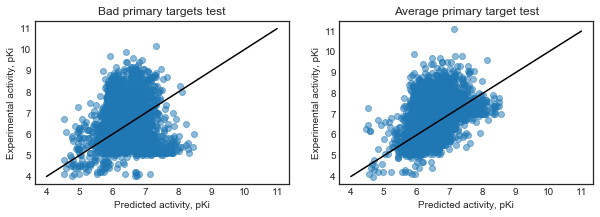

In [20]:
f = plt.figure(figsize=(10,3))

plt.style.use("seaborn-white")
fig1=f.add_subplot(121)
fig1.scatter(test1_prediction, y_test1, alpha=0.5)
fig1.plot([4,11], [4,11], c='black')
fig1.set_title("Bad primary targets test")
fig1.set_xlabel("Predicted activity, pKi")
fig1.set_ylabel("Experimental activity, pKi")

fig2=f.add_subplot(122)
fig2.scatter(test2_prediction, y_test2, alpha=0.5)
fig2.plot([4,11], [4,11], c='black')
fig2.set_title("Average primary target test")
fig2.set_xlabel("Predicted activity, pKi")
fig2.set_ylabel("Experimental activity, pKi")
f.show()

In [21]:
test1_prediction_rf = RF_model.predict(np.array(x_test1))
y_test1=np.array(y_test1)

print(scipy.stats.pearsonr(test1_prediction_rf, y_test1) )

(0.039674316341691884, 0.0055099712058536325)


In [22]:
test2_prediction_rf = RF_model.predict(np.array(x_test2))
y_test2=np.array(y_test2)

print(scipy.stats.pearsonr(test2_prediction_rf, y_test2) )

(0.5165337977417275, 9.689602678418071e-287)


/home/arina/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


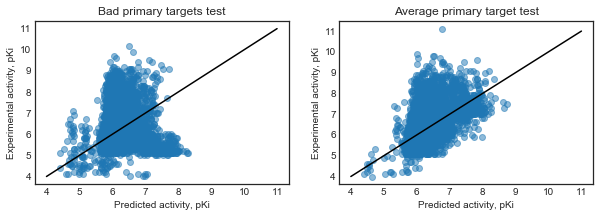

In [23]:
f = plt.figure(figsize=(10,3))
fig1=f.add_subplot(121)
fig1.scatter(test1_prediction_rf, y_test1, alpha=0.5)
fig1.plot([4,11], [4,11], c='black')
fig1.set_title("Bad primary targets test")
fig1.set_xlabel("Predicted activity, pKi")
fig1.set_ylabel("Experimental activity, pKi")

fig2=f.add_subplot(122)
fig2.scatter(test2_prediction_rf, y_test2, alpha=0.5)
fig2.plot([4,11], [4,11], c='black')
fig2.set_title("Average primary target test")
fig2.set_xlabel("Predicted activity, pKi")
fig2.set_ylabel("Experimental activity, pKi")
f.show()